### This is a regression problem in which we will try to predict price of a laptop

#### Import the Dependencies

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
import regex as re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv("laptops.csv")
df

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,https://rukminim1.flixcart.com/image/312/312/k...,ASUS VivoBook 15 Core i3 10th Gen,37990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,15.6,4.0,1907.0,227.0
980,980,https://rukminim1.flixcart.com/image/312/312/k...,HP Chromebook MediaTek Kompanio 500,22670,MediaTek MediaTek Kompanio 500 Processor,4 GB LPDDR4X RAM,Chrome Operating System,1 TB HDD,11.6,3.8,5991.0,687.0
981,981,https://rukminim1.flixcart.com/image/312/312/x...,ASUS Ryzen 5 Hexa Core,54990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,14.0,4.5,22.0,5.0
982,982,https://rukminim1.flixcart.com/image/312/312/k...,DELL Inspiron Core i3 11th Gen,40990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.0,801.0,104.0


In [5]:
df.drop(columns=['Unnamed: 0','img_link','no_of_ratings','no_of_reviews'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              984 non-null    object 
 1   price(in Rs.)     984 non-null    int64  
 2   processor         984 non-null    object 
 3   ram               984 non-null    object 
 4   os                984 non-null    object 
 5   storage           984 non-null    object 
 6   display(in inch)  984 non-null    float64
 7   rating            688 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 61.6+ KB


In [7]:
df.shape

(984, 8)

In [8]:
df.columns

Index(['name', 'price(in Rs.)', 'processor', 'ram', 'os', 'storage',
       'display(in inch)', 'rating'],
      dtype='object')

In [9]:
df.isnull().mean()*100

name                 0.000000
price(in Rs.)        0.000000
processor            0.000000
ram                  0.000000
os                   0.000000
storage              0.000000
display(in inch)     0.000000
rating              30.081301
dtype: float64

In [10]:
df.drop(columns=['rating'],inplace=True)

In [11]:
df.isnull().mean()*100

name                0.0
price(in Rs.)       0.0
processor           0.0
ram                 0.0
os                  0.0
storage             0.0
display(in inch)    0.0
dtype: float64

## Univarite analysis

### HISTOGRAM

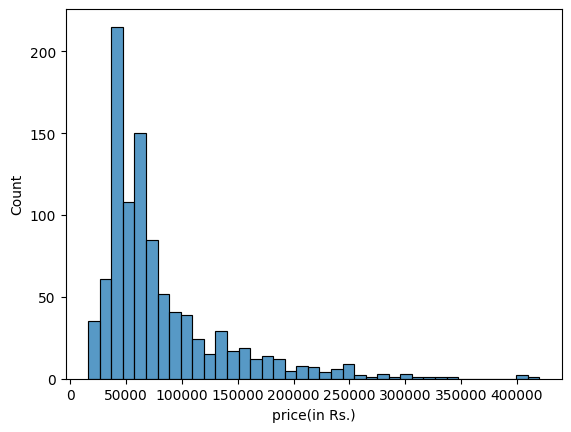

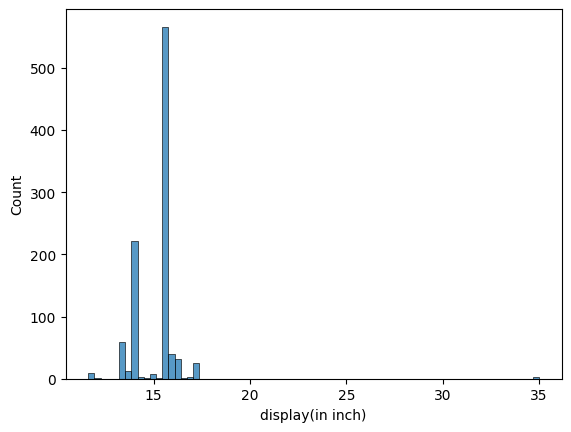

In [12]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.histplot(df[i])
        plt.show()
        

### KDE PLOT

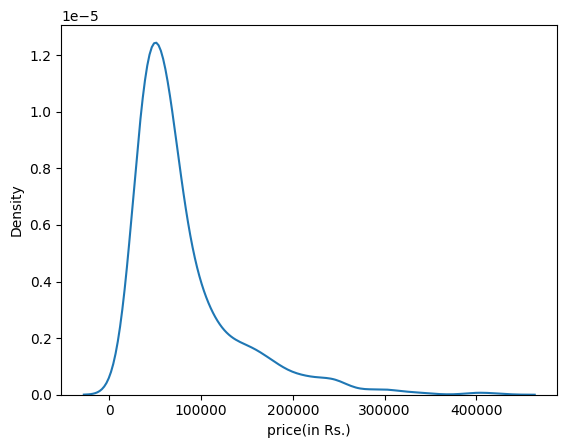

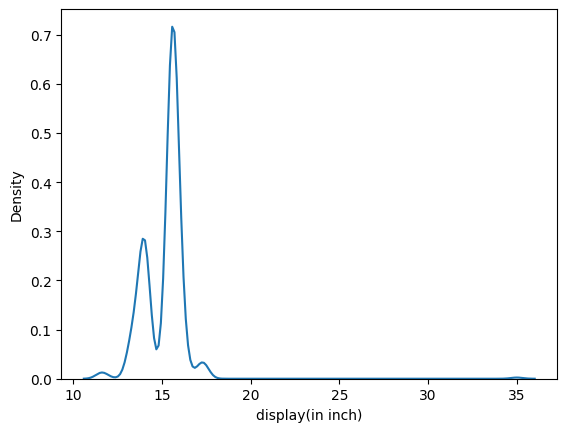

In [13]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.kdeplot(df[i])
    plt.show()

### BOX PLOT

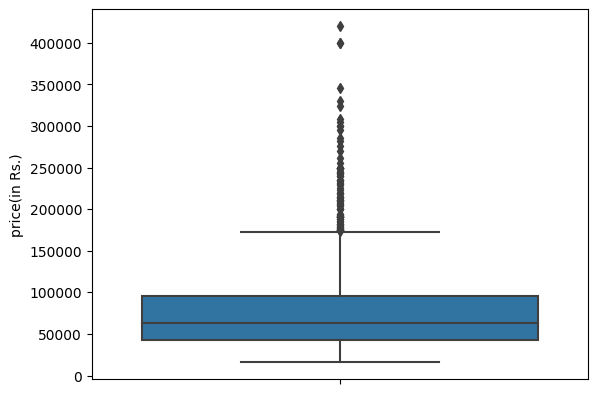

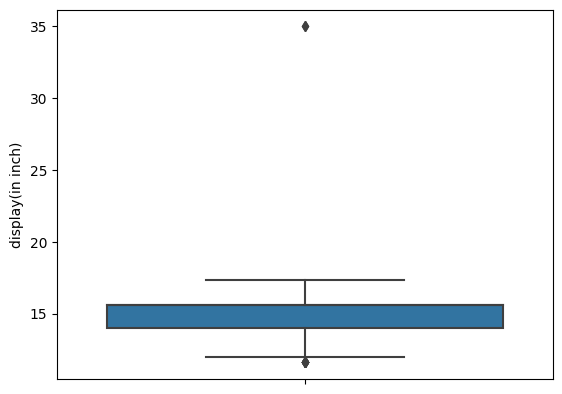

In [14]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i])
    plt.show()

## Multivariate analysis

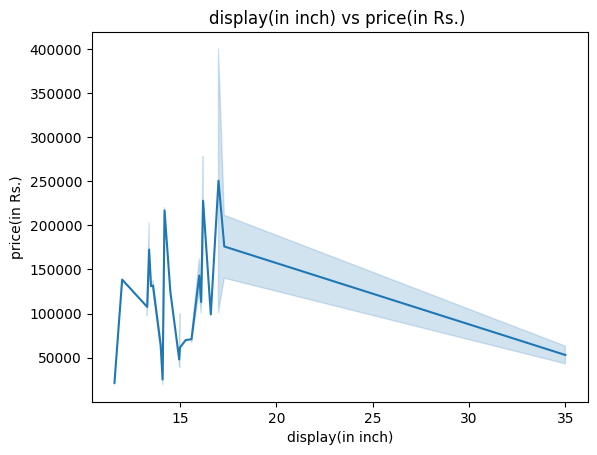

In [15]:
sns.lineplot('display(in inch)','price(in Rs.)',data=df)
plt.title("display(in inch) vs price(in Rs.) ")
plt.show()

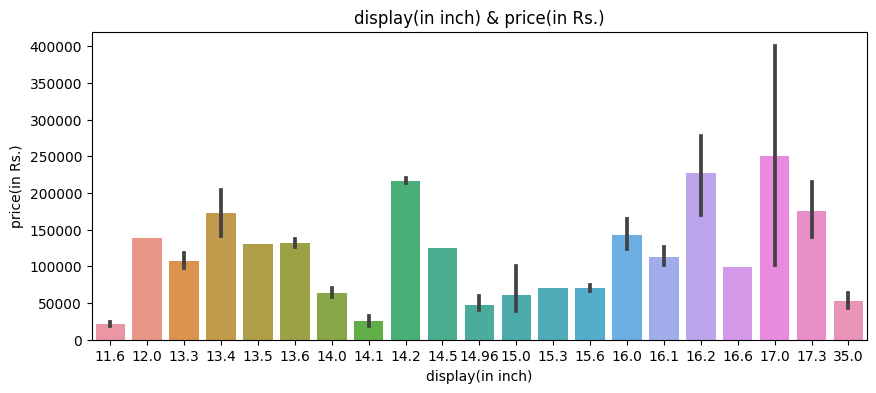

In [18]:
plt.figure(figsize=(10,4))
sns.barplot('display(in inch)','price(in Rs.)',data=df)
plt.title("display(in inch) & price(in Rs.)")
plt.show()

### Set the outliers

In [19]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL
    

In [20]:
for i in df.columns:
    if df[i].dtype != 'object':
        UL,LL= outlier_limit(df[i])        
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])
 

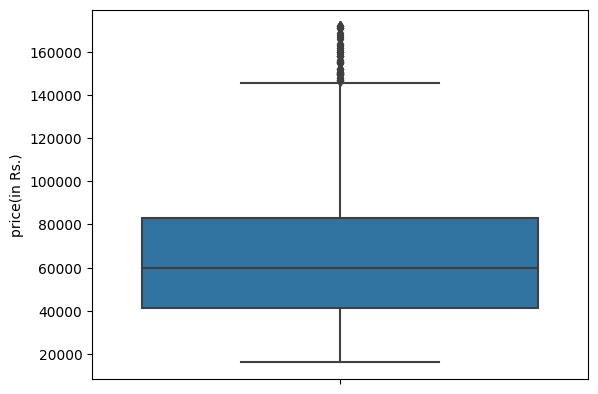

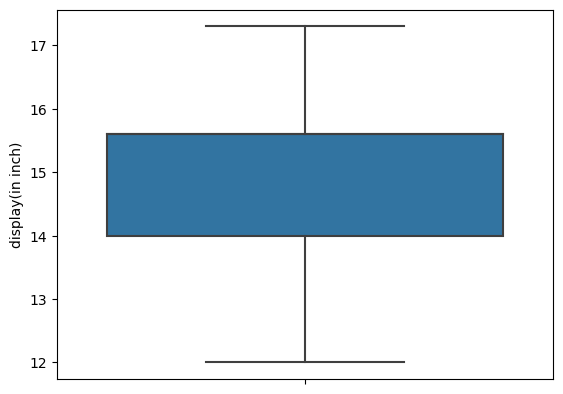

In [21]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show();

In [22]:
df.dropna(inplace=True)

In [24]:
le=LabelEncoder()

In [26]:
df["name"]=le.fit_transform(df.name)
df["processor"]=le.fit_transform(df.processor)
df["ram"]=le.fit_transform(df.ram)
df["os"]=le.fit_transform(df.os)
df["storage"]=le.fit_transform(df.storage)

In [27]:
df.sample(10)

,name,price(in Rs.),processor,ram,os,storage,display(in inch)
823,345,52890.0,31,1,10,12,15.6
689,150,42890.0,26,15,4,2,15.6
356,204,71590.0,12,1,4,12,16.0
34,218,58018.0,32,15,4,12,15.6
870,392,160990.0,38,1,3,2,15.6
273,140,104990.0,39,5,4,12,13.3
512,36,114990.0,32,2,10,12,13.4
167,320,47039.0,8,15,4,12,15.6
443,201,36890.0,5,15,4,10,14.0
64,257,89990.0,40,1,4,4,14.0


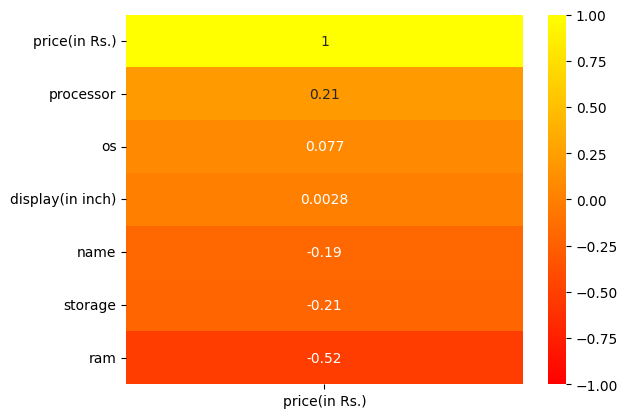

In [28]:
sns.heatmap(df.corr()[["price(in Rs.)"]].sort_values(by="price(in Rs.)",ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

In [29]:
x=df[['processor','os','display(in inch)']].values

In [30]:
y=df[['price(in Rs.)']].values

## Model Buliding Using Cross Validation

In [31]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [32]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  33302.12023460555
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  33301.99718169664
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  33302.032643736864
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  35906.423570942105
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  18793.31850874568
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  17676.0481461776
***********************************************************

### Random Forest Regressor has lowest RMSE value 

### Feature Scaling

In [33]:
sc = StandardScaler()

In [34]:
x=sc.fit_transform(x)

#### Splitting into training and testing


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
RF= RandomForestRegressor()

In [37]:
RF.fit(x_train, y_train)

RandomForestRegressor()

In [38]:
training_score = RF.score(x_train, y_train)
training_score

0.8378725206209927

In [39]:
testing_score = RF.score(x_test, y_test)
testing_score

0.736219840956297

In [40]:
y_pred = RF.predict(x)

In [41]:
output = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
output

,ACTUAL,PREDICTED
0,62990.0,59094.918926
1,37500.0,38456.371180
2,49990.0,60902.202118
3,33990.0,34865.000699
4,18990.0,22592.033333
...,...,...
888,21990.0,30262.983476
889,37990.0,39740.896032
890,54990.0,59820.226094
891,40990.0,38456.371180


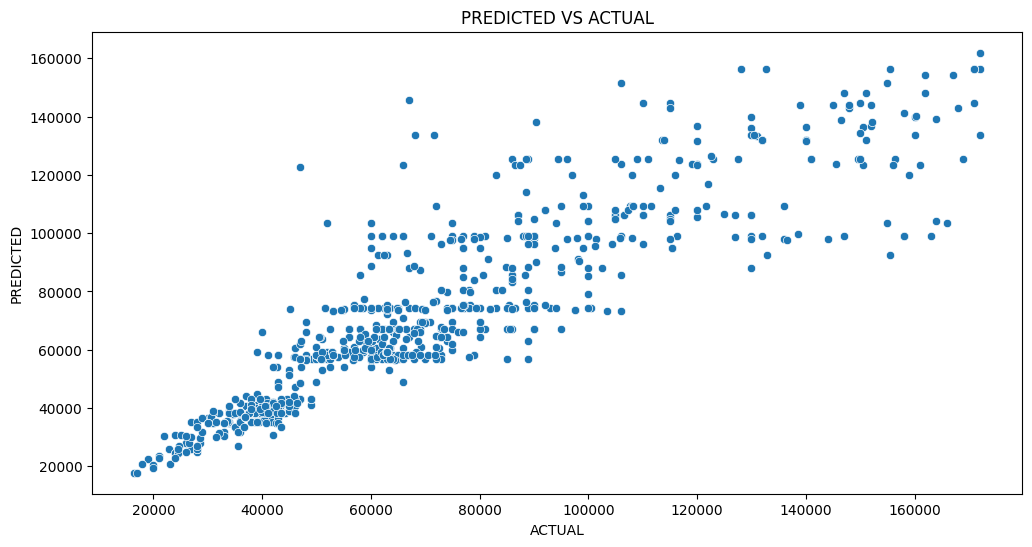

In [42]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL")
sns.scatterplot(data=output, x="ACTUAL", y = "PREDICTED");